In [78]:
# Import dependencies
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import*
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*
from sklearn import svm
from sklearn.naive_bayes import*

In [79]:
#read the dataset
data = 'avocado-updated-2020.csv'
#df = pd.read_csv(data, index_col = 'geography')
df = pd.read_csv(data)
df.head(15)

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1/4/2015,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,1/4/2015,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,1/4/2015,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,1/4/2015,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,1/4/2015,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington
5,1/4/2015,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.0,organic,2015,Baltimore/Washington
6,1/4/2015,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise
7,1/4/2015,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise
8,1/4/2015,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston
9,1/4/2015,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.0,organic,2015,Boston


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


In [81]:
# Determine number of rows and columns
df.shape

(30021, 13)

In [100]:
#Delete the date column from the dataset
del df['date']

In [101]:
#Determine if there is duplicated data
print('total number of duplicate values : ',sum(df.duplicated()))

total number of duplicate values :  0


In [83]:
#Determine the distribution of the data
local_counts = df.geography.value_counts()
local_counts

Southeast               556
Tampa                   556
Spokane                 556
Chicago                 556
Hartford/Springfield    556
Total U.S.              556
Albany                  556
Roanoke                 556
Louisville              556
Midsouth                556
Syracuse                556
Plains                  556
South Carolina          556
Miami/Ft. Lauderdale    556
Buffalo/Rochester       556
California              556
Cincinnati/Dayton       556
Atlanta                 556
Boise                   556
Phoenix/Tucson          556
New York                556
Pittsburgh              556
Denver                  556
Grand Rapids            556
Baltimore/Washington    556
West                    556
San Diego               556
Philadelphia            556
Seattle                 556
Jacksonville            556
Charlotte               556
Harrisburg/Scranton     556
Dallas/Ft. Worth        556
Los Angeles             556
Orlando                 556
Northern New England

In [102]:
#Determine the features of the training set by seeing the correlations to each column
df.corr()

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
average_price,1.000000,-0.380790,-0.409728,-0.242031,-0.221899,-0.332997,-0.294901,-0.310370,-0.095240,0.598610,-0.015018,0.035767
total_volume,-0.380790,1.000000,0.859635,0.806280,0.554844,0.918630,0.910087,0.603157,0.424335,-0.506195,0.074952,-0.006631
4046,-0.409728,0.859635,1.000000,0.481318,0.441625,0.748779,0.736106,0.503131,0.358304,-0.432954,0.019559,0.039569
4225,-0.242031,0.806280,0.481318,1.000000,0.484715,0.614200,0.649847,0.326477,0.152826,-0.443136,-0.031500,-0.039437
4770,-0.221899,0.554844,0.441625,0.484715,1.000000,0.440503,0.461919,0.195744,0.414736,-0.322260,-0.064270,-0.082951
total_bags,-0.332997,0.918630,0.748779,0.614200,0.440503,1.000000,0.956425,0.723928,0.546969,-0.431785,0.201221,-0.008337
small_bags,-0.294901,0.910087,0.736106,0.649847,0.461919,0.956425,1.000000,0.494662,0.503003,-0.395865,0.145206,-0.013389
large_bags,-0.310370,0.603157,0.503131,0.326477,0.195744,0.723928,0.494662,1.000000,0.332738,-0.364810,0.256625,0.009031
xlarge_bags,-0.095240,0.424335,0.358304,0.152826,0.414736,0.546969,0.503003,0.332738,1.000000,-0.160680,0.112498,-0.019160
type,0.598610,-0.506195,-0.432954,-0.443136,-0.322260,-0.431785,-0.395865,-0.364810,-0.160680,1.000000,0.000067,-0.000203


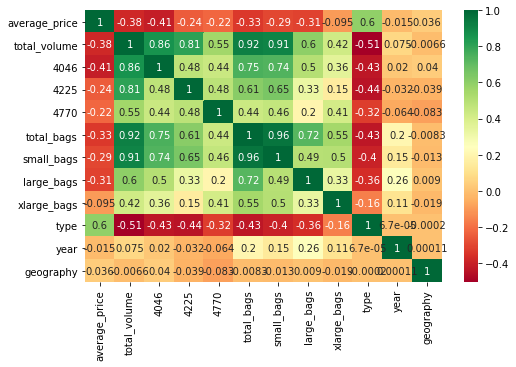

In [103]:
#Plot the relationships in a heat map to visualize the degree of relatedness each column has to average_price.
plt.subplots(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn")
plt.show()

In [104]:
# Drop the geography columns that will create more noise in the training model.
df.drop(df.loc[df['geography']== 'California'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northeast'].index, inplace=True)
df.drop(df.loc[df['geography']== 'South Central'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Plains'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Northern New England'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Total U.S.'].index, inplace=True)
df.drop(df.loc[df['geography']== 'West'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Great Lakes'].index, inplace=True)
df.drop(df.loc[df['geography']== 'Southeast'].index, inplace=True)
df.head(20)

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,1,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,1,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,2
5,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,1,2015,2
6,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.00,0,2015,3
7,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.00,1,2015,3
8,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.00,0,2015,4
9,1.83,2192.13,8.66,939.43,0.00,1244.04,1244.04,0.00,0.00,1,2015,4


In [105]:
#train the data by putting the average_price in the y axis and all other columns in the x axis
X=df.drop('average_price',1)
y=df['average_price']

In [106]:
# print the shape of an 80/20 train test split over the dataset
print('shape of X and y :',X.shape,y.shape)

shape of X and y : (25017, 11) (25017,)


In [107]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [108]:
print('shape of X and y (train) :',X_train.shape,y_train.shape)
print('shape of X and y (test) :',X_test.shape,y_test.shape)

shape of X and y (train) : (20013, 11) (20013,)
shape of X and y (test) : (5004, 11) (5004,)


In [109]:
#Encode the catagorical columns for use in the ml model
le = LabelEncoder()
df['geography'] = le.fit_transform(df['geography'])

In [110]:
label = LabelEncoder()
df['type'] = label.fit_transform(df['type'])
df

,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,0
1,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,1,2015,0
2,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,1
3,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,1,2015,1
4,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...
30012,1.63,1798.00,249.00,143.00,0.00,1407.00,1111.00,295.00,0.00,1,2020,42
30013,1.12,591420.66,238039.66,16379.48,151.06,336846.03,276681.61,60134.42,30.00,0,2020,43
30014,1.19,14134.00,200.00,0.00,0.00,13933.00,13933.00,0.00,0.00,1,2020,43
30019,0.89,1240709.05,430203.10,126497.28,21104.42,662904.25,395909.35,265177.09,1817.81,0,2020,44


In [111]:
# Determine which columns ar not contributing a pattern or key for the best accuracy
scaler=VarianceThreshold(0.1)

In [112]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [113]:
print('shape of X (train) :',X_train.shape)
print('shape of X (test) :',X_test.shape)

shape of X (train) : (20013, 11)
shape of X (test) : (5004, 11)


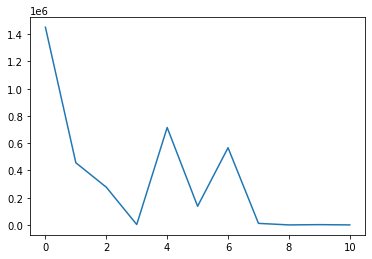

In [114]:
#Scale and Normalize the data
plt.plot(X_train[0])

In [115]:
scaler=StandardScaler()

In [116]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [117]:
# Change the dataframe into a numpy ndarray
print("Type of X_train :",type(X_train))
print("Type of X_test :",type(X_test))

Type of X_train : <class 'numpy.ndarray'>
Type of X_test : <class 'numpy.ndarray'>


In [118]:
#Convert the ndarray into a pandas dataframe
X_train=pd.DataFrame(X_train)
X_train.head()
X_test=pd.DataFrame(X_test)
X_test.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.241662,-0.420421,0.128448,-0.186241,-0.315484,-0.330782,-0.173604,-0.099382,-1.000850,-1.403022,-1.080970
1,-0.536790,-0.441441,-0.464772,-0.321269,-0.478294,-0.445640,-0.393523,-0.156890,0.999151,1.776320,-1.697490
2,-0.300769,-0.126963,-0.348796,-0.260807,-0.288290,-0.203528,-0.380640,-0.153658,-1.000850,-0.131285,-1.003905
3,-0.495055,-0.440625,-0.465113,-0.320739,-0.376249,-0.307058,-0.406434,-0.156890,0.999151,-0.131285,-0.618580
4,-0.344886,-0.215288,-0.446504,0.253312,-0.281143,-0.303267,-0.124952,-0.148720,-1.000850,0.504583,-1.466295


In [119]:
print('Type of X_train and X_test :',type(X_train),type(X_test))

Type of X_train and X_test : <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [126]:
actr=[]
acts=[]
lstr=[]
lsts=[]

In [127]:
#Create a RandomForest pipeline
rf = RandomForestRegressor(random_state=0)

In [128]:
rf.fit(X_train,y_train)
y_tr1=rf.predict(X_train)
y_pr=rf.predict(X_test)

print('train data accuracy :',rf.score(X_train,y_train))
print('test data accuracy :',rf.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1))
print('loss of test data :',mean_squared_error(y_test,y_pr))

train data accuracy : 0.9776462323265759
test data accuracy : 0.8372282742399242
loss of train data : 0.003415688013791035
loss of test data : 0.024432503770983213


In [129]:
actr.append(rf.score(X_train,y_train))
acts.append(rf.score(X_test,y_test))
lstr.append(mean_squared_error(y_train,y_tr1))
lsts.append(mean_squared_error(y_test,y_pr))

In [130]:
#Evaluation
model = ['Random Forest']

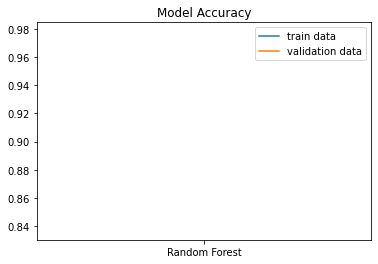

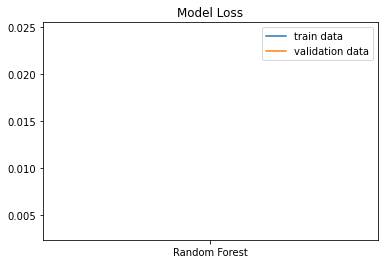

In [131]:
plt.title('Model Accuracy')
plt.plot(model,actr,label='train data')
plt.plot(model,acts,label='validation data')
plt.legend()
plt.show()

plt.title('Model Loss')
plt.plot(model,lstr,label='train data')
plt.plot(model,lsts,label='validation data')
plt.legend()
plt.show()